# Proyek Analisis Data: Nama dataset
- Nama  : Devita Indha Sari
- Email : devitaindhas@gmail.com
- Id Dicoding : dvtindhs (Devita Indha Sari)

## Menentukan Pertanyaan Bisnis

- Jumlah sewa sepeda harian pada hari kerja dan hari libur berdasarkan musim
- Jumlah Sewa Sepeda berdasarkan waktu (jam dan bulan)
- Jumlah Sewa Sepeda Berdasarkan Jenis Penyewa

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bike-sharing/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bike-sharing/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Dataframe Hour (`hour_df`)

##### Informasi Data

*Memeriksa informasi data seperti : nama kolom, tipe data, jumlah data*

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Duplicated Value

*Memeriksa duplikasi pada data*


In [ ]:
print("Jumlah duplikasi pada dataframe Hour ", hour_df.duplicated().sum())

Jumlah duplikasi pada dataframe Hour  0


##### Missing Value
*Memeriksa ada tidaknya nilai yang hilang*


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Deskripsi Data
*Mendeskripsikan data menggunakan parameter statistik*

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Dataframe Day (`day_df`)

##### Informasi Data

*Memeriksa informasi data seperti : nama kolom, tipe data, jumlah data*

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Duplicated Value

*Memeriksa duplikasi pada data*

In [ ]:
print("Jumlah duplikasi pada dataframe Day ", day_df.duplicated().sum())

Jumlah duplikasi pada dataframe Day  0


##### Missing Value
*Memeriksa ada tidaknya nilai yang hilang*


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Deskripsi Data
*Mendeskripsikan data menggunakan parameter statistik*

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Mengganti nama kolom

In [ ]:
def rename_column(df):
  df.rename(columns={
      'instant' : 'index',
      'dteday' : 'dateday',
      'hr' : 'hour',
      'yr' : 'year',
      'weathersit' : 'weather',
      'mnth' : 'month',
      'hum' : 'humidity',
      'cnt' : 'total'
    }, inplace=True)

rename_column(hour_df)
rename_column(day_df)

#### Mengubah beberapa kolom menjadi kategori

*Dalam hal ini, terdapat kolom yang dapat diubah nilainya menjadi kategori agar lebih mudah dipahami user. Antara lain: musim (season), cuaca (weaher), dan hari (weekday)*

In [ ]:
def convert_categorical(df): #Function untuk mengelompokkan DataFrame berdasarkan kategori

  df['season'] = df.season.astype('category')
  df['weather'] = df.weather.astype('category')
  df['weekday'] = df.weekday.astype('category')
  df['month'] = df.month.astype('category')

  df.season.replace({1 : 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'}, inplace=True)
  df.weather.replace({1 : 'Clear', 2 : 'Misty/Cloudy', 3 : 'Light Snow/Rain', 4 : 'Heavy Rain'}, inplace=True)
  df.weekday.replace({0 : 'Sun', 1 : 'Mon', 2 : 'Tue', 3 : 'Wed', 4 : 'Thu', 5 : 'Fri', 6 : 'Sat'}, inplace=True)

  month_categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  df['month'] = pd.Categorical(df['month'].replace(list(range(1, 13)), month_categories), categories=month_categories, ordered=True)

In [ ]:
convert_categorical(day_df)
convert_categorical(hour_df)

#### Memperbaiki ketidakkonsistenan atau kesalahan nilai dataset

1.   Mengecek apakah ada konflik nilai holiday dan workingday (bernilai sama) : *Ditemukan adanya nilai 'holiday' dan 'workingday' yang konflik (bernilai sama)
Namun, harus kita lihat pada hari apa itu terjadi serta nilai kolom 'holiday' dan 'workingday'
Pada dataframe day_df dan hour_df ditemukan konflik data pada hari Sat dan Sun yang mana merupakan hari libur
sehingga nilai 'holiday' harus diganti dengan 1 dan 'workingday' bernilai 0*

In [ ]:
def conflict_values(df):
  conflict_hol_work = df[(df['holiday'] == df['workingday'])]
  return conflict_hol_work[['dateday', 'weekday', 'workingday', 'holiday']], conflict_hol_work.index

def change_conflict_value(df, i): # Function untuk mengganti nilai holiday dan/atau workingday menjadi nilai yang seharusnya
  df.loc[i, 'holiday'] = 1 - df.loc[i, 'holiday']

In [ ]:
conflict_values(day_df)[0].groupby(['weekday', 'workingday', 'holiday']).dateday.count()

weekday  workingday  holiday
Sun      0           0          105
Mon      0           0            0
Tue      0           0            0
Wed      0           0            0
Thu      0           0            0
Fri      0           0            0
Sat      0           0          105
Name: dateday, dtype: int64

In [ ]:
change_conflict_value(day_df, conflict_values(day_df)[1])

In [ ]:
conflict_values(hour_df)[0].groupby(['weekday', 'workingday', 'holiday']).dateday.count()

weekday  workingday  holiday
Sun      0           0          2502
Mon      0           0             0
Tue      0           0             0
Wed      0           0             0
Thu      0           0             0
Fri      0           0             0
Sat      0           0          2512
Name: dateday, dtype: int64

In [ ]:
change_conflict_value(hour_df, conflict_values(hour_df)[1])

## Exploratory Data Analysis (EDA)

In [ ]:
#Function untuk memastikan jumlah penyewa 'casual' dan 'registered' sama dengan 'total'
def casual_registered_sum(df):
  return (df['casual'] + df['registered'] == df['total']).all()

### Explore Dataframe Day (`day_df`)

*   Pastikan jumlah sewa Casual dan Registered sama dengan Total



In [ ]:
casual_registered_sum(day_df)

True

*   Jumlah sewa harian pada hari libur (holiday) dan hari kerja (workingday)



In [ ]:
day_df.groupby(by=['holiday', 'workingday']).agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
})

,,casual,registered,total
holiday,workingday,,,
0,1,303285,1989125,2292410
1,0,316732,683537,1000269


*   Banyaknya sewa harian pada tiap musim



In [ ]:
day_df.groupby(by=['season']).agg({
    'total' : 'sum'
})

,total
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


*   Total sewa harian berdasarkan cuaca



In [ ]:
day_df.groupby(by='weather').agg({
    'total' : 'sum'
})

,total
weather,
Clear,2257952
Misty/Cloudy,996858
Light Snow/Rain,37869


*   Total sewa harian berdasarkan hari





In [ ]:
day_df.groupby(by='weekday').agg({
    'total' : 'sum'
})

,total
weekday,
Sun,444027
Mon,455503
Tue,469109
Wed,473048
Thu,485395
Fri,487790
Sat,477807


In [ ]:
day_df.groupby(by='month').agg({
    'total' : 'sum'
})

,total
month,
Jan,134933
Feb,151352
Mar,228920
Apr,269094
May,331686
Jun,346342
Jul,344948
Aug,351194
Sep,345991


### Explore Dataframe Hour (`hour_df`)

*   Pastikan jumlah sewa Casual dan Registered sama dengan Total



In [ ]:
casual_registered_sum(hour_df)

True

*   Total sewa per-jam di tiap musim



In [ ]:
hour_df.groupby(by='hour').total.sum()

hour
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: total, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: **Jumlah sewa sepeda harian pada hari kerja dan hari libur berdasarkan musim**

In [ ]:
day_df['day_category'] = day_df['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Holiday')

daily_df = day_df.groupby(by=['season', 'day_category']).total.sum().unstack()
daily_df['total_daily_byseason'] = daily_df['Working Day'] + daily_df['Holiday']
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 4 entries, Spring to Winter
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Holiday               4 non-null      int64
 1   Working Day           4 non-null      int64
 2   total_daily_byseason  4 non-null      int64
dtypes: int64(3)
memory usage: 304.0 bytes


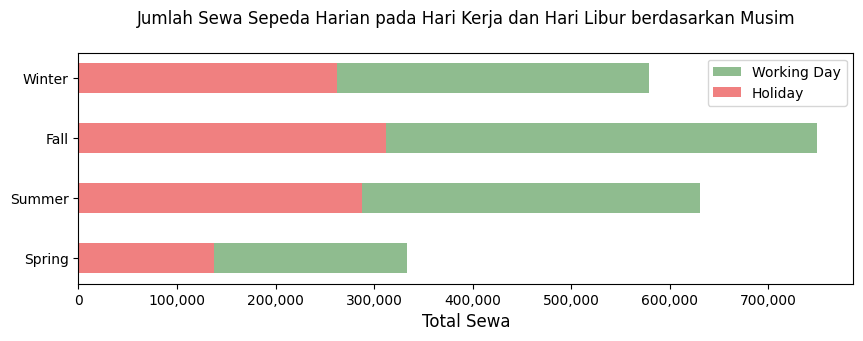

In [ ]:
plt.subplots(figsize=(10,3))
plt.barh(daily_df.index, daily_df['Working Day'], height=.5, color='darkseagreen', label='Working Day')
plt.barh(daily_df.index, daily_df['Holiday'], height=.5, color='lightcoral', label='Holiday')

plt.title('Jumlah Sewa Sepeda Harian pada Hari Kerja dan Hari Libur berdasarkan Musim\n')
plt.xlabel('Total Sewa', fontsize=12)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(loc='upper right')
plt.show()

### Pertanyaan 2: **Jumlah Sewa Sepeda berdasarkan waktu (jam dan bulan)**

In [ ]:
hourly_df = hour_df.groupby(by='hour').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : ['sum', 'mean']
})
hourly_df.columns = hourly_df.columns.droplevel(1)
hourly_df.columns = ['casual_sum', 'registered_sum', 'total_sum', 'total_mean']
hour = hourly_df.index

#### Rata-Rata Sewa Sepeda Setiap Jam

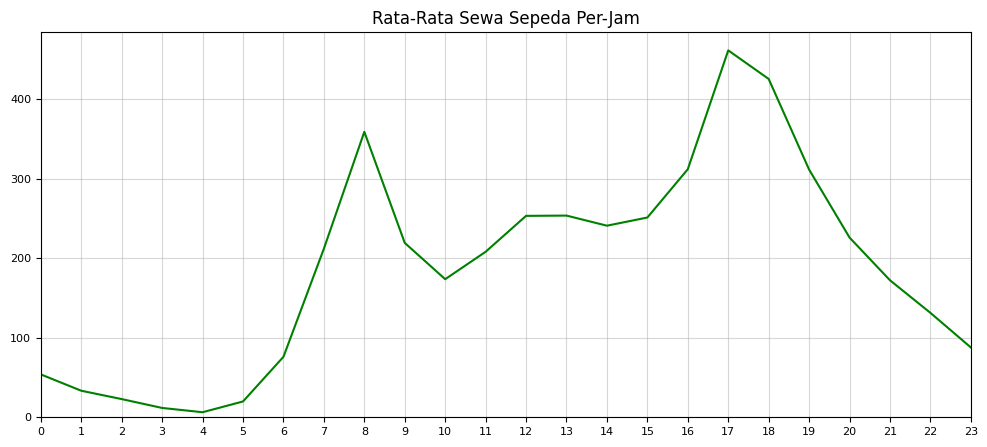

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(hour, hourly_df['total_mean'], linestyle='-', color='green')
plt.xticks(hour)
plt.xlim(0, max(hour))
plt.ylim(0)

plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=8)

plt.title('Rata-Rata Sewa Sepeda Per-Jam')
plt.grid(True, alpha=0.5)
plt.show()

#### Rata-Rata Sewa Sepeda Setiap Bulan

In [ ]:
monthly_df = hour_df.groupby(by='month').agg({
    'total' : ['sum', 'mean']
})
monthly_df.columns = monthly_df.columns.droplevel(1)
monthly_df.columns = ['monthly_total', 'monthly_mean']
month = monthly_df.index

monthly_df

,monthly_total,monthly_mean
month,,
Jan,134933,94.424773
Feb,151352,112.865026
Mar,228920,155.410726
Apr,269094,187.260960
May,331686,222.907258
Jun,346342,240.515278
Jul,344948,231.819892
Aug,351194,238.097627
Sep,345991,240.773138


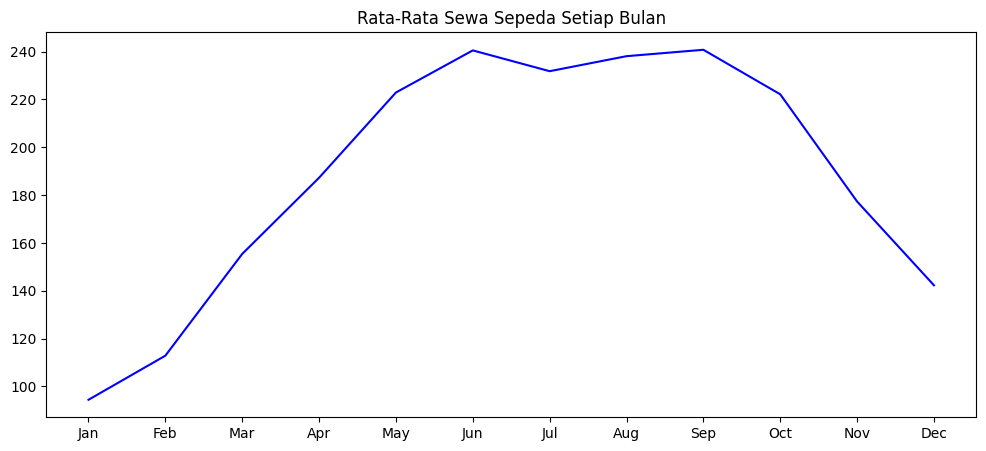

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(month, monthly_df['monthly_mean'], linestyle='-', color='blue')
plt.xticks(month)

plt.title('Rata-Rata Sewa Sepeda Setiap Bulan')
plt.show()

### Pertanyaan 3: Jumlah Sewa Sepeda Berdasarkan Jenis Penyewa

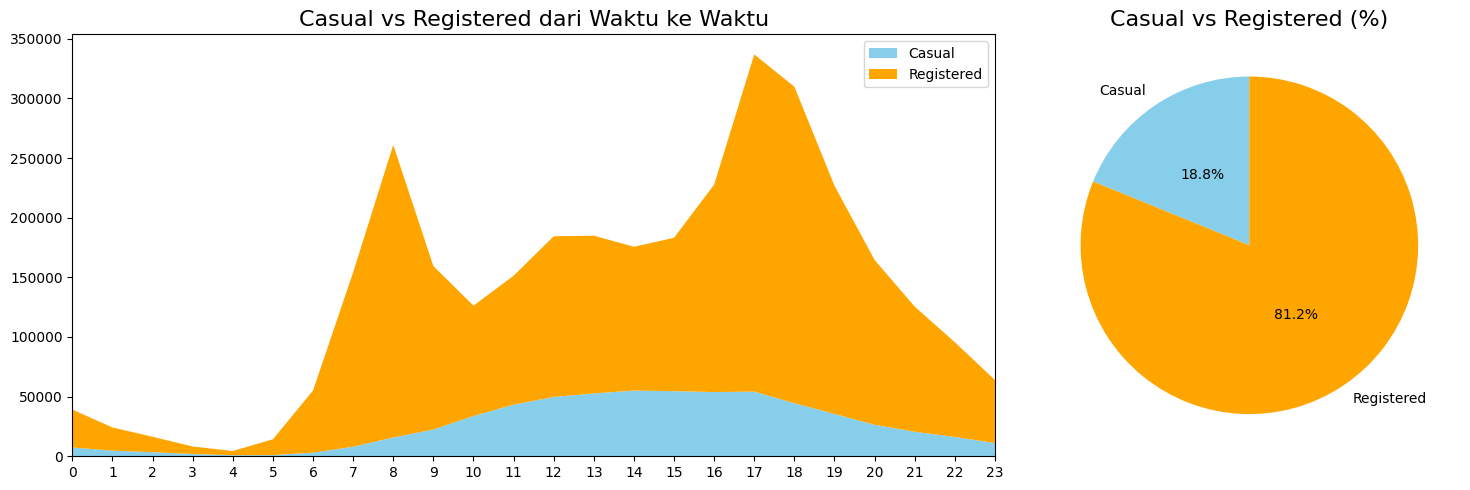

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), gridspec_kw={'width_ratios': [2, 1]})

ax[0].stackplot(hourly_df.index, hourly_df['casual_sum'], hourly_df['registered_sum'], labels=['Casual', 'Registered'], colors=['skyblue', 'orange'])
ax[0].set_xticks(hourly_df.index)
ax[0].set_xlim(0, max(hourly_df.index))
ax[0].set_ylim(0)
ax[0].set_title('Casual vs Registered dari Waktu ke Waktu', fontsize=16)
ax[0].legend()

sizes = [hour_df['casual'].sum(), hour_df['registered'].sum()]
labels = ['Casual', 'Registered']
colors = ['skyblue', 'orange']

ax[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.5)
ax[1].set_title('Casual vs Registered (%)', fontsize=16)

plt.tight_layout()

## Conclusion

1. Conclusion 1: Jumlah sewa sepeda harian pada hari kerja dan hari libur berdasarkan musim
> Berdasarkan grafik diatas, dapat dilihat bahwa sewa harian sepeda paling banyak di **hari kerja (Working Day)** pada musim **musim gugur (fall)**

2. Conclution 2: Jumlah sewa sepeda berdasarkan waktu


> * Setiap Jam
>> Jumlah penyewa sepeda yang cukup ramai yaitu pagi hari sekitar pukul 07.00 - 09.00 puncaknya pada **pukul 08.00** dan pada sore hari sekitar pukul 16.00 - 18.00 puncaknya adalah **pukul 17.00**.

> * Setiap Bulan
>> Jumlah penyewa sepeda bervariatif setiap bulan terutama
 di bulan Juni hingga September. Dan rata-rata paling banyak di **bulan September**.

3. Conclusion 3: Jumlah Sewa Sepeda Berdasarkan Jenis Penyewa
> Berdasarkan grafik, dapat dilihat bahwa penyewa terbanyak adalah **Penyewa Terdaftar (Registered)**



